In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/shots-2019-preprocessed.csv", index_col=0)
df.head()

,game_id,year,month,day,winner,loser,y,x,play,time_remaining,...,distance,team,winner_score,loser_score,overtime,team_score,opp_score,time_remaining_game,x_adj,y_adj
0,201910220TOR,2019,10,22,Toronto,New Orleans,147,242,"1st quarter, 11:48.0 remaining<br>Lonzo Ball m...",11:48.0,...,11,New Orleans,0,0,0,0,0,2868.0,251.929847,163.416223
1,201910220TOR,2019,10,22,Toronto,New Orleans,27,240,"1st quarter, 11:47.0 remaining<br>Derrick Favo...",11:47.0,...,1,New Orleans,0,2,0,0,0,2867.0,249.929847,43.416223
2,201910220TOR,2019,10,22,Toronto,New Orleans,60,256,"1st quarter, 11:29.0 remaining<br>OG Anunoby m...",11:29.0,...,3,Toronto,0,2,0,0,2,2849.0,265.929847,76.416223
3,201910220TOR,2019,10,22,Toronto,New Orleans,32,320,"1st quarter, 11:16.0 remaining<br>Jrue Holiday...",11:16.0,...,8,New Orleans,0,2,0,2,0,2836.0,329.929847,48.416223
4,201910220TOR,2019,10,22,Toronto,New Orleans,208,418,"1st quarter, 11:11.0 remaining<br>Kyle Lowry m...",11:11.0,...,25,Toronto,0,2,0,0,2,2831.0,427.929847,224.416223


In [5]:
point_df = df.replace({"outcome":{"missed": 0, "made": 1}}).groupby("distance")["outcome"].mean().reset_index()
point_df["points"] = point_df["distance"].apply(lambda x: 3 if x >= 23 else 2)
point_df["exp_points"] = point_df["outcome"] * point_df["points"]
point_df.head()

,distance,outcome,points,exp_points
0,0,0.840589,2,1.681178
1,1,0.725711,2,1.451422
2,2,0.617737,2,1.235474
3,3,0.475016,2,0.950033
4,4,0.378295,2,0.756590


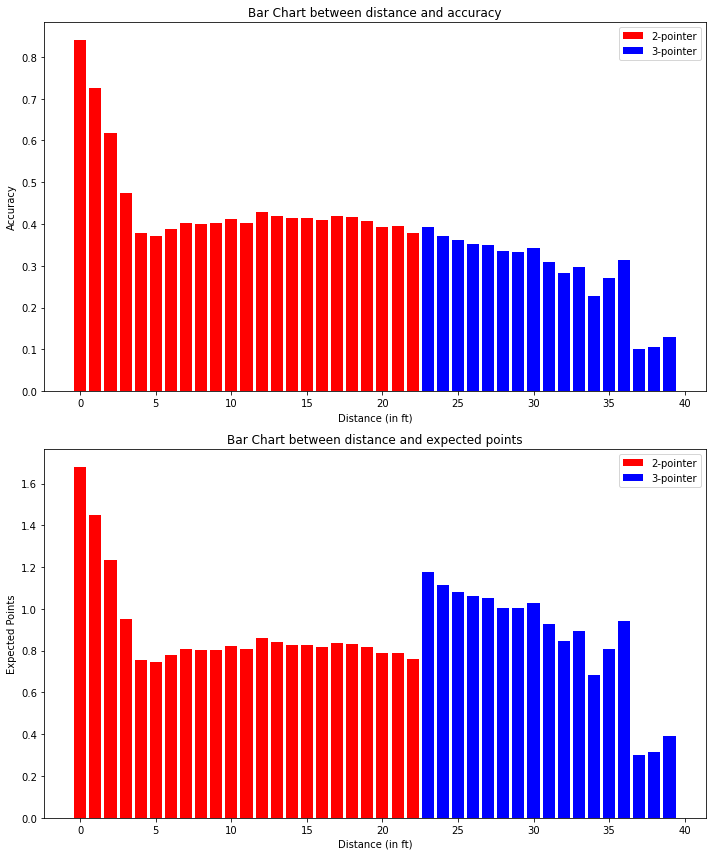

In [9]:
fig, ax = plt.subplots(2,1, figsize=(10,12))

ax[0].bar(point_df[point_df["points"]==2]["distance"], point_df[point_df["points"]==2]["outcome"], color = "red")
ax[0].bar(point_df[point_df["points"]==3]["distance"], point_df[point_df["points"]==3]["outcome"], color = "blue")
ax[0].legend(labels=["2-pointer", "3-pointer"])
ax[0].set_xlabel("Distance (in ft)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Bar Chart between distance and accuracy")

ax[1].bar(point_df[point_df["points"]==2]["distance"], point_df[point_df["points"]==2]["exp_points"], color = "red")
ax[1].bar(point_df[point_df["points"]==3]["distance"], point_df[point_df["points"]==3]["exp_points"], color = "blue")
ax[1].legend(labels=["2-pointer", "3-pointer"])
ax[1].set_xlabel("Distance (in ft)")
ax[1].set_ylabel("Expected Points")
ax[1].set_title("Bar Chart between distance and expected points")

plt.tight_layout()
plt.show()

In [6]:
df2000 = pd.read_csv("../data/shots-2000-preprocessed.csv", index_col=0)
df2000.head()

,game_id,year,month,day,winner,loser,y,x,play,time_remaining,...,distance,team,winner_score,loser_score,overtime,team_score,opp_score,time_remaining_game,x_adj,y_adj
0,200011040VAN,2000,11,4,LA Lakers,Vancouver,126,108,"1st quarter, 11:44.0 remaining<br>Michael Dick...",11:44.0,...,15,Vancouver,0,0,0,0,0,2864.0,118.004873,125.975867
1,200011040VAN,2000,11,4,LA Lakers,Vancouver,126,403,"1st quarter, 11:26.0 remaining<br>Kobe Bryant ...",11:26.0,...,18,LA Lakers,0,0,0,0,0,2846.0,413.004873,125.975867
2,200011040VAN,2000,11,4,LA Lakers,Vancouver,200,87,"1st quarter, 11:20.0 remaining<br>Mike Bibby m...",11:20.0,...,21,Vancouver,0,0,0,0,0,2840.0,97.004873,199.975867
3,200011040VAN,2000,11,4,LA Lakers,Vancouver,244,310,"1st quarter, 10:58.0 remaining<br>Kobe Bryant ...",10:58.0,...,21,LA Lakers,0,0,0,0,0,2818.0,320.004873,243.975867
4,200011040VAN,2000,11,4,LA Lakers,Vancouver,50,222,"1st quarter, 10:49.0 remaining<br>Othella Harr...",10:49.0,...,2,Vancouver,0,2,0,0,0,2809.0,232.004873,49.975867


In [7]:
point_df2000 = df2000.replace({"outcome":{"missed": 0, "made": 1}}).groupby("distance")["outcome"].mean().reset_index()
point_df2000["points"] = point_df2000["distance"].apply(lambda x: 3 if x >= 23 else 2)
point_df2000["exp_points"] = point_df2000["outcome"] * point_df2000["points"]
point_df2000.head()

,distance,outcome,points,exp_points
0,0,0.629742,2,1.259483
1,1,0.704343,2,1.408687
2,2,0.530443,2,1.060887
3,3,0.363830,2,0.727660
4,4,0.351215,2,0.702429


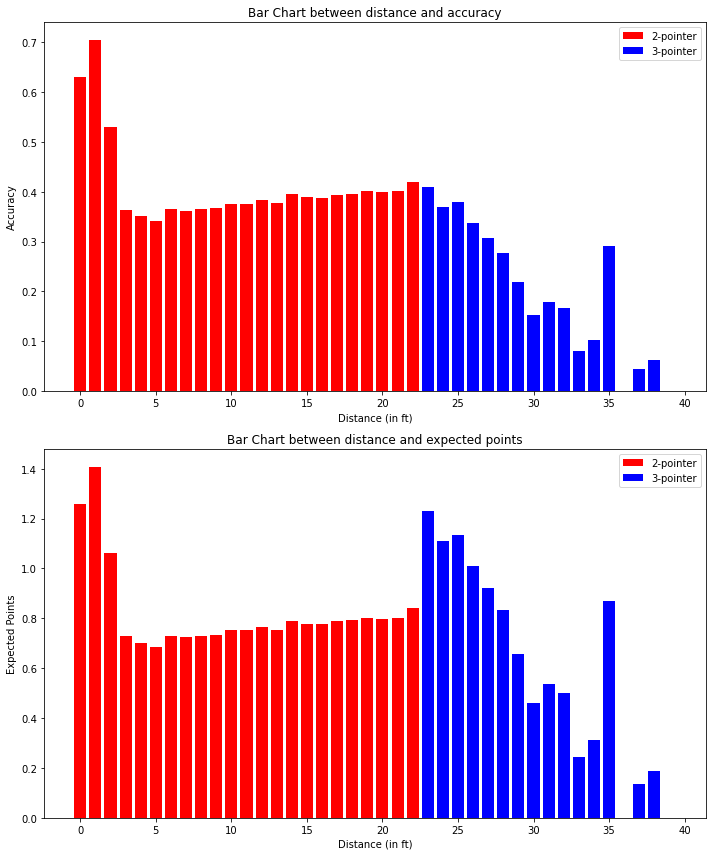

In [8]:
fig, ax = plt.subplots(2,1, figsize=(10,12))

ax[0].bar(point_df2000[point_df2000["points"]==2]["distance"], point_df2000[point_df2000["points"]==2]["outcome"], color = "red")
ax[0].bar(point_df2000[point_df2000["points"]==3]["distance"], point_df2000[point_df2000["points"]==3]["outcome"], color = "blue")
ax[0].legend(labels=["2-pointer", "3-pointer"])
ax[0].set_xlabel("Distance (in ft)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Bar Chart between distance and accuracy")

ax[1].bar(point_df2000[point_df2000["points"]==2]["distance"], point_df2000[point_df2000["points"]==2]["exp_points"], color = "red")
ax[1].bar(point_df2000[point_df2000["points"]==3]["distance"], point_df2000[point_df2000["points"]==3]["exp_points"], color = "blue")
ax[1].legend(labels=["2-pointer", "3-pointer"])
ax[1].set_xlabel("Distance (in ft)")
ax[1].set_ylabel("Expected Points")
ax[1].set_title("Bar Chart between distance and expected points")

plt.tight_layout()
plt.show()